In [36]:
#grab dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from functools import partial,reduce
import seaborn as sns
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [44]:
#get path
path = os.getcwd()
#get list of files
city_files = os.listdir(path)
#get only county files
city_files = [file for file in city_files if file.startswith("City")]

#functions
#write a function that will only take in string that contain numbers
def contains_number(s):
    return any(i.isdigit() for i in s)

#grab RegionID,RegionName,State,Metro,CountyName
def contains_id(s):
    condition = ['State','StateName','RegionName','Metro','CountyName']
    return(s in condition)

#lets make a loop to convert each csv to a gathered dataframe
list_gathered_data_frames = []
for file in city_files:
    #read in the dataframe
    frame = pd.read_csv(file,encoding = "ISO-8859-1")
    #get list of column names
    col_names = frame.columns
    #get names of columnes to be gathered
    gathered_columns = [column for column in col_names if contains_number(column) == True]
    #identify index columns
    index_columns = [column for column in col_names if contains_number(column) == False]
    #grab only columns used for ID
    index_columns_ID = [column for column in index_columns if contains_id(column) == True]
    #melt the dataframe
    melted_frame = pd.melt(frame=frame, value_vars= gathered_columns, id_vars= index_columns_ID,
                        var_name="Year_Mon",value_name=file)
    #grab column names from melted frame
    melted_frame_columns = melted_frame.columns
    #convert 'StateName' to "State"
    if "StateName" in melted_frame_columns:
        #rename "StateName to "State":
        melted_frame.rename(columns = {"StateName": "State"},inplace=True)
    #convert state abbreviation to statename
    if len(melted_frame['State'][0]) == 2:
        melted_frame["State"] = melted_frame['State'].map(states)
    #add data frame to list
    list_gathered_data_frames.append(melted_frame)

#final merge
merged_frame=list_gathered_data_frames[0]
for i in range(len(list_gathered_data_frames)-1):
    merged_frame = pd.merge(merged_frame,list_gathered_data_frames[i+1],how="outer",
                                 on=["RegionName", "Year_Mon","State","Metro","CountyName"])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


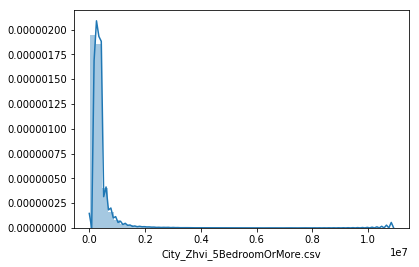

In [35]:
merged_frame.head(8)

In [45]:
merged_frame.head(8)

,RegionName,State,Metro,CountyName,Year_Mon,City_Zhvi_2bedroom.csv,City_MedianValuePerSqft_AllHomes.csv,City_Zhvi_BottomTier.csv,City_Zhvi_5BedroomOrMore.csv,City_Zhvi_SingleFamilyResidence.csv,City_Zhvi_3bedroom.csv,City_Zhvi_4bedroom.csv,City_Zhvi_TopTier.csv,City_Zhvi_AllHomes.csv,City_Zhvi_Condominum.csv,City_Zhvi_1bedroom.csv
0,Los Angeles,California,Los Angeles-Long Beach-Anaheim,Los Angeles County,1996-04,130700.0,110.0,116300.0,366800.0,165200.0,157100.0,214300.0,299000.0,157700.0,130000.0,94300.0
1,Houston,Texas,Houston-The Woodlands-Sugar Land,Harris County,1996-04,50300.0,50.0,45700.0,432400.0,89100.0,79400.0,143900.0,268700.0,86500.0,58600.0,50500.0
2,Chicago,Illinois,Chicago-Naperville-Elgin,Cook County,1996-04,89700.0,88.0,65900.0,173900.0,113200.0,115000.0,150200.0,182900.0,114000.0,114800.0,87200.0
3,San Antonio,Texas,San Antonio-New Braunfels,Bexar County,1996-04,48300.0,54.0,48400.0,215000.0,87300.0,81900.0,139000.0,154000.0,86600.0,66000.0,39500.0
4,Philadelphia,Pennsylvania,Philadelphia-Camden-Wilmington,Philadelphia County,1996-04,42300.0,38.0,NaN,94000.0,46000.0,39700.0,61600.0,88100.0,48500.0,74900.0,66600.0
5,Las Vegas,Nevada,Las Vegas-Henderson-Paradise,Clark County,1996-04,90400.0,76.0,84300.0,214400.0,132600.0,123600.0,157000.0,190800.0,126000.0,79200.0,67300.0
6,San Diego,California,San Diego-Carlsbad,San Diego County,1996-04,127800.0,111.0,105400.0,303000.0,178700.0,162100.0,209400.0,267400.0,160100.0,125300.0,77900.0
7,Dallas,Texas,Dallas-Fort Worth-Arlington,Dallas County,1996-04,54600.0,54.0,45300.0,NaN,80800.0,75700.0,210300.0,255900.0,78500.0,68100.0,54100.0
